In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connexion à la base de données SQLite
conn = sqlite3.connect('C:/Users/Cassandra/OneDrive/Documents/Université/UNINE/2024 - Printemps/Application de méthodes/Les_astronautes/astronautes.db') 

# Requête SQL pour extraire les dates de naissance et les nationalités
query = """
SELECT nationalite, date_naissance 
FROM personne
"""

# Exécuter la requête et charger les résultats dans un DataFrame
df = pd.read_sql_query(query, conn)



In [5]:
# Convertir les dates de naissance en entiers pour enlever les .0
df['date_naissance'] = pd.to_numeric(df['date_naissance'], errors='coerce').astype('Int64')

# Filtrer les lignes où date_naissance est null 
df = df.dropna(subset=['date_naissance'])

# Compter le nombre de naissances par année et par nationalité
birth_counts = df.groupby(['date_naissance', 'nationalite']).size().unstack(fill_value=0)


<Figure size 1500x1000 with 0 Axes>

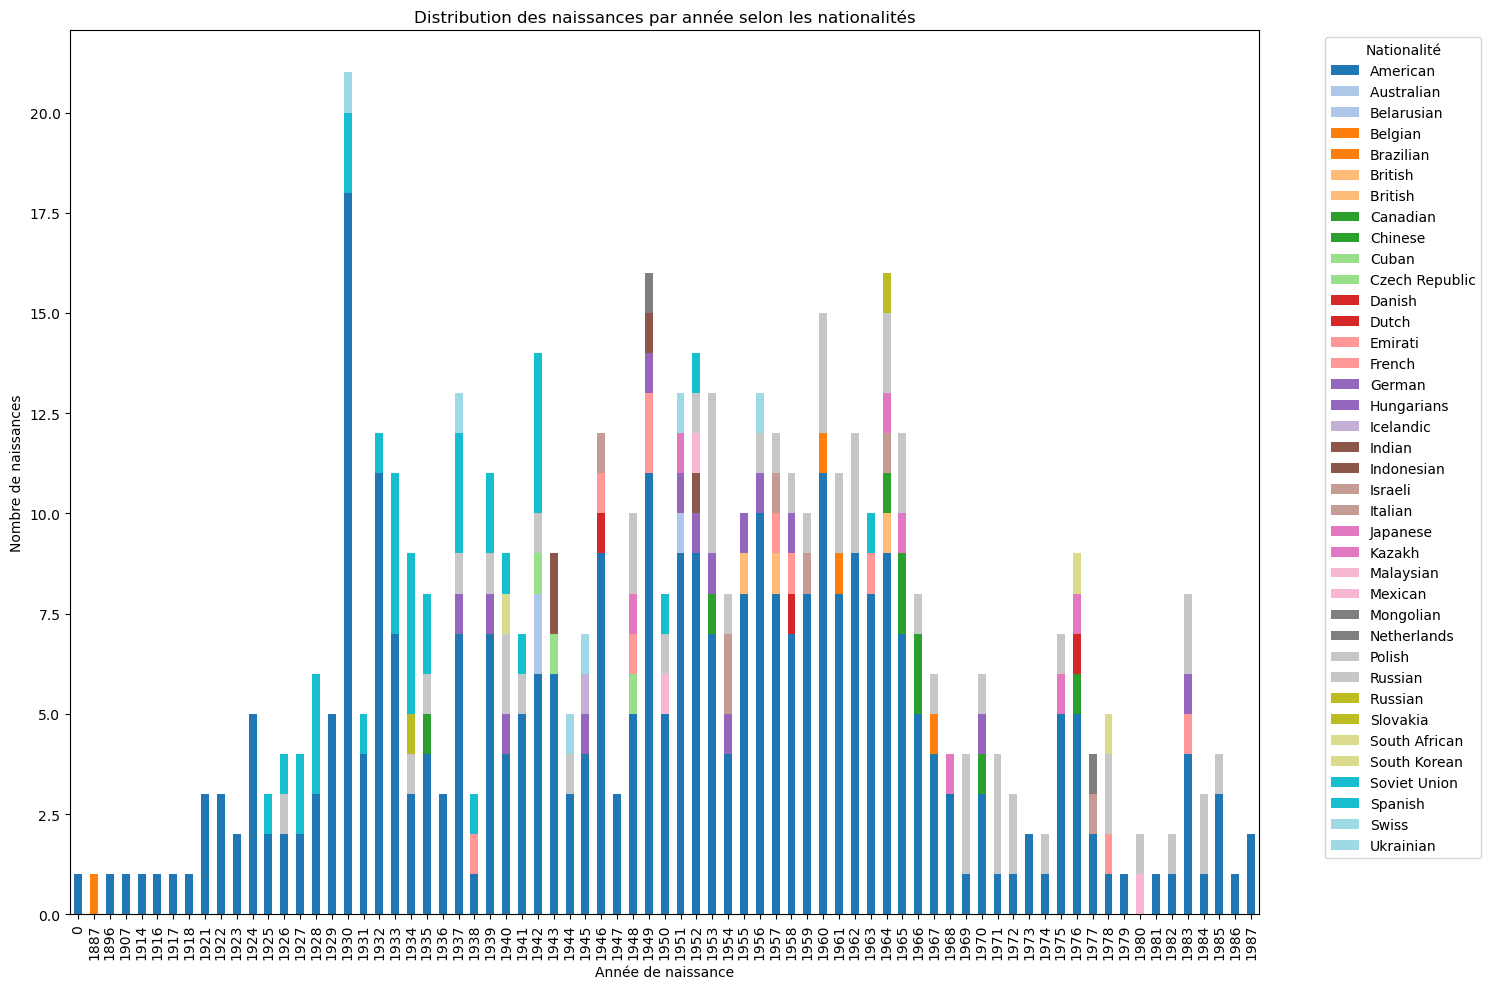

In [6]:
# Création du graphique en barres empilées
plt.figure(figsize=(15, 10))
birth_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 10))

# Titre et labels
plt.title('Distribution des naissances par année selon les nationalités')
plt.xlabel('Année de naissance')
plt.ylabel('Nombre de naissances')

# Légende
plt.legend(title='Nationalité', bbox_to_anchor=(1.05, 1), loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()
